<a href="https://colab.research.google.com/github/shoobhaum/DSMLNotebooks/blob/master/end_to_end_dog_breed_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dog Breed Identification**

This notebook builds an end to end multiclass image classifier using TensorFlow 2.0 and TensorFlow Hub.

## 1. Problem

Identifying the breed of a dog given an image of a dog

## 2. Data

We are using data from Kaggle's Dog Breed competition

https://www.kaggle.com/c/dog-breed-identification/data


## 3. Evaluation

The Evaluation is a file with prediction probabilities for each of the 120 dog breeds test images.

## 4. Features

Some information about the data:
* We're dealing with images (unstructures data) so it is best if we use deep learning/transfer learning

* There are 120 breeds of dogs (this means there are 120 classes)

* There are 10,000+ images in the training dataset (these have labels)

* There are 10,000+ images in the test dataset

## Get our workspace ready

* Import TensorFlow 2.X
* Import TensorFlow Hub
* Make sure to use GPU

In [1]:
import tensorflow as tf
import tensorflow_hub as hub

print(tf.__version__)
print(hub.__version__)

# Check for GPU
print("GPU", "available" if tf.config.list_physical_devices("GPU") else "not available")


2.4.0
0.10.0
GPU available


In [3]:
#!unzip "/content/drive/MyDrive/DogVision/dog-breed-identification.zip" -d "/content/drive/MyDrive/DogVision"

## Getting out data ready (turning it in tensors)


In [7]:
import pandas as pd
labels = pd.read_csv('/content/drive/MyDrive/DogVision/labels.csv')
labels

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


In [8]:
# how many images for each breed?
labels.breed.value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
komondor                 67
brabancon_griffon        67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

In [9]:
labels.describe()

,id,breed
count,10222,10222
unique,10222,120
top,22b278473423ec37384e1bf0483805a0,scottish_deerhound
freq,1,126


In [10]:
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


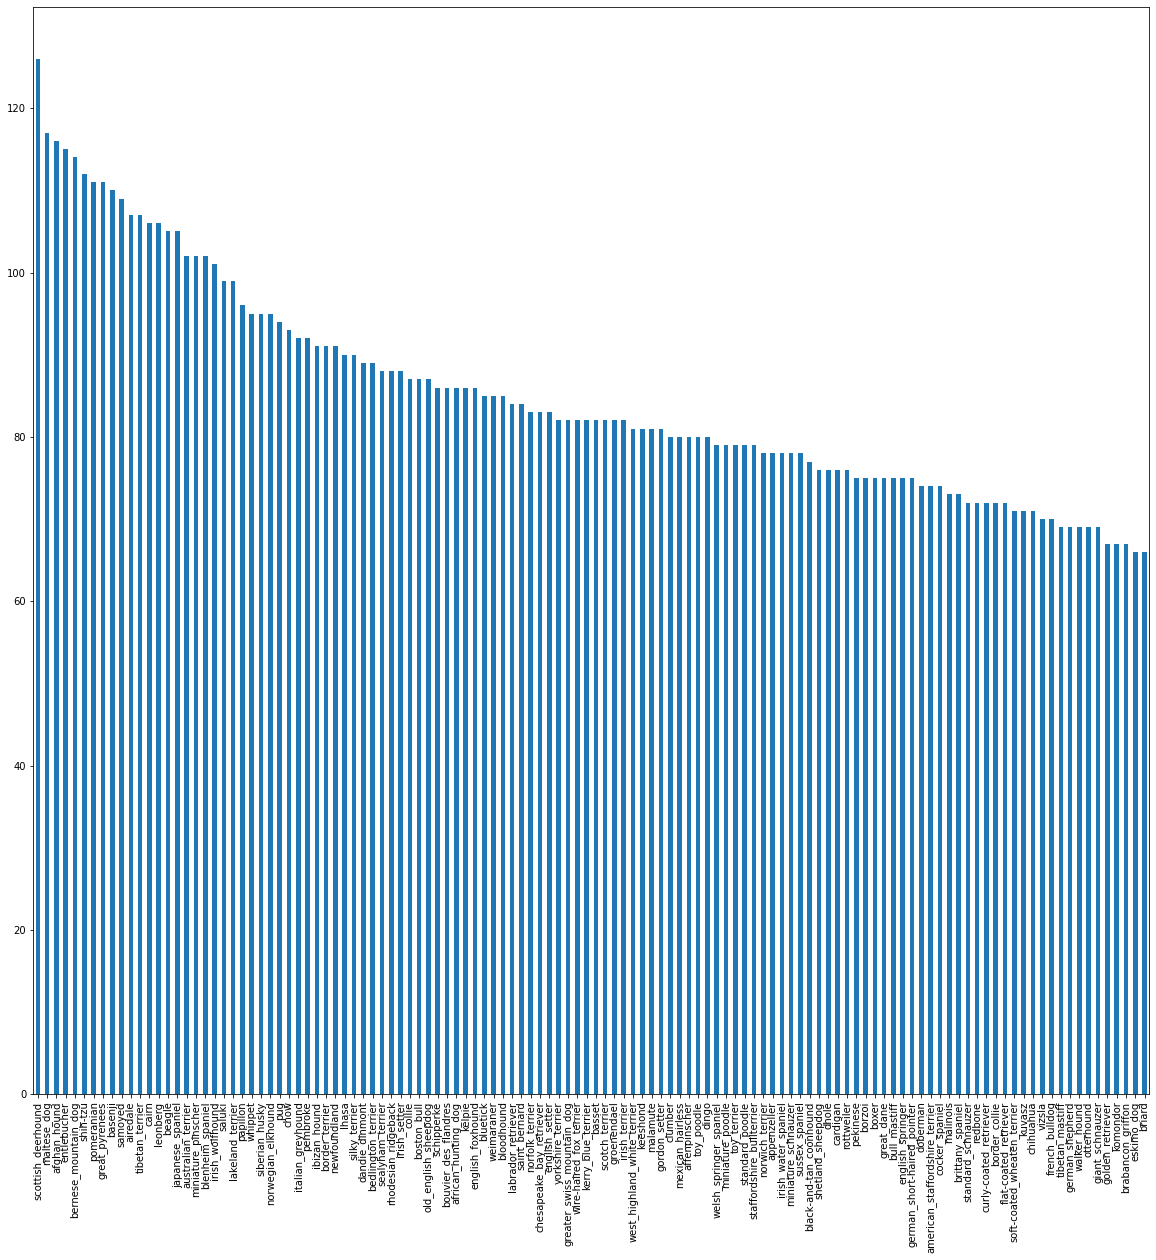

In [12]:
# Visualizing the different breeds
labels.breed.value_counts().plot.bar(figsize=(20,20))